In [1]:
import colorsys
import numpy as np
import matplotlib.pyplot as plt
import skimage
from matplotlib import cm
from svgpathtools import svg2paths

In [2]:
# ------ plot color wheel ------
def plot_wheel(t_type, fig=plt.figure(), sub=None, all=False):
    # generate random data
    theta = np.linspace(0, 2*np.pi, 360)
    r = np.random.uniform(0.8, 1, 360)

    T, R = np.meshgrid(theta, r)  # create a meshgrid for pcolormesh
    C = T / (2*np.pi)  # create the color values for each meshgrid point

    # plot the polar plot
    if not all:
        ax = fig.add_subplot(111, projection='polar')
    else:
        ax = fig.add_subplot(sub, projection='polar')
    ax.set_axis_off()

    # hue wheel
    ax.pcolormesh(T, R, C, cmap=cm.hsv)

    # gray region
    if t_type == "i":
        a0, a1, b0, b1 = 81 * np.pi / 180, 99 * np.pi / 180, 0, 0
    elif t_type == "V":
        a0, a1, b0, b1 = 43.2 * np.pi / 180, 136.8 * np.pi / 180, 0, 0
    elif t_type == "L":
        a0, a1 = 81 * np.pi / 180, 99 * np.pi / 180
        b0, b1 = 39.6 * np.pi / 180, -39.6 * np.pi / 180
    elif t_type == "I":
        a0, a1 = 81 * np.pi / 180, 99 * np.pi / 180
        b0, b1 = 261 * np.pi / 180, 279 * np.pi / 180
    elif t_type == "T":
        a0, a1, b0, b1 = np.pi/2, -np.pi/2, 0, 0
    elif t_type == "Y":
        a0, a1 = 43.2 * np.pi / 180, 136.8 * np.pi / 180
        b0, b1 = 261 * np.pi / 180, 279 * np.pi / 180
    elif t_type == "X":
        a0, a1 = 43.2 * np.pi / 180, 136.8 * np.pi / 180
        b0, b1 = 223.2 * np.pi / 180, 316.8 * np.pi / 180
    elif t_type == "N":
        a0, a1, b0, b1 = 0, 0, 0, 0
    theta = np.linspace(a0, a1, 100)
    ax.fill_between(theta, 0.8, color='#bdbdbd', edgecolor='none')
    theta = np.linspace(b0, b1, 100)
    ax.fill_between(theta, 0.8, color='#bdbdbd', edgecolor='none')

    # center
    ax.scatter(0, 0, color='black', marker='o', s=50)
    plt.title(t_type)
    if not all: plt.show()

# fig = plt.figure(figsize=(10, 6))
# plot_wheel("i", fig, 241, True)
# plot_wheel("V", fig, 242, True)
# plot_wheel("L", fig, 243, True)
# plot_wheel("I", fig, 244, True)
# plot_wheel("T", fig, 245, True)
# plot_wheel("Y", fig, 246, True)
# plot_wheel("X", fig, 247, True)
# plot_wheel("N", fig, 248, True)
# plt.show()

<Figure size 640x480 with 0 Axes>

In [37]:
# ------ read icon and preprocessing ------
# read svg file
# paths, attributes = svg2paths('030-storm-14.svg')
# paths, attributes = svg2paths('001-coffee cup.svg')
paths, attributes = svg2paths('038-cloudy-3.svg')

rgb = []
hue = []
hs = []

# extract colors and convert to hsv
for ele in attributes:
    if 'style' in ele:
        hex = ele['style'].split('#')[1].replace(';', '')
        _rgb = tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))  # hex to rgb
        # hsv = colorsys.rgb_to_hsv(_rgb[0]/255.0, _rgb[1]/255.0, _rgb[2]/255.0)  # rgb to hsv
    elif 'fill' in ele:
        hex = ele['fill'].replace('#', '')
        _rgb = tuple(int(hex[i:i+2], 16) for i in (0, 2, 4))
        
    # get ground truth color
    l, a, b = skimage.color.rgb2lab(np.array(_rgb)/255.0)
    gt_rgb = skimage.color.lab2rgb([50, a, b])  # 0-1
    hsv = colorsys.rgb_to_hsv(gt_rgb[0], gt_rgb[1], gt_rgb[2])
    
    if int(hsv[0]*360) == 360: h = 0  # 360 is the same as 0
    else: h = int(hsv[0]*360)
    # rgb.append(np.array(_rgb)/255.0)
    rgb.append(np.array(gt_rgb))
    hue.append(h)
    hs.append([h, hsv[1]*100])
        
# print(hue)
print(hs)

# # convert input color to vector with probability
# vec = [1/len(set(hue)) if i in set(hue) else 0 for i in range(360)]
# for i in set(hue):
#     prob = hue.count(i) / len(hue)  # probability of occurrence = times / number of colors
#     vec[i] = prob
# vec = np.array(vec)
# # print(vec)

[[47, 100.0], [47, 100.0], [47, 100.0], [203, 52.547705023647], [203, 52.547705023647], [203, 52.547705023647], [203, 52.547705023647], [203, 52.547705023647]]


In [19]:
# # ------ calculate the distance between input colors and templates ------
# # ------ use vector and probability distribution ------
# tm = dict()
# alpha = 0
# tm["i"] = np.array([1]*18 + [alpha]*342)
# tm["V"] = np.array([1]*94 + [alpha]*266)
# tm["I"] = np.array([1]*18 + [alpha]*162 + [1]*18 + [alpha]*162)
# tm["Y"] = np.array([1]*94 + [alpha]*124 + [1]*18 + [alpha]*124)
# tm["L"] = np.array([1]*18 + [alpha]*41 + [1]*79 + [alpha]*222)
# tm["X"] = np.array([1]*94 + [alpha]*86 + [1]*94 + [alpha]*86)
# tm["T"] = np.array([1]*180 + [alpha]*180)

# # shift hue wheel
# def shift_hue(arr, t):
#     n = len(arr)
#     return np.concatenate((arr[-t % n:], arr[:-t % n]))

# # find valid region
# def find_region(arr, tm):
#     idx = 0
#     if arr[0] == 1 and arr[-1] != 1:
#         idx = 0
#     else:
#         for i in range(1, 360):
#             if arr[i] == 1 and arr[i-1] == alpha:
#                 idx = i
#                 break
            
#     if tm == 'i': return [idx, idx+18-1, 0, 0]
#     elif tm == 'V': return [idx, idx+94-1, 0, 0]
#     elif tm == 'L': return [idx, idx+18-1, idx+18+41, idx+18+41+79-1]
#     elif tm == 'I': return [idx, idx+18-1, idx+18+162, idx+18+162+18-1]
#     elif tm == 'T': return [idx, idx+180-1, 0, 0]
#     elif tm == 'Y': return [idx, idx+94-1, idx+94+124, idx+94+124+18-1]
#     elif tm == 'X': return [idx, idx+94-1, idx+94+86, idx+94+86+94-1]
#     else: return [0, 0, 0, 0]

# best_tm = (None, -1)
# region_tm = [0, 0, 0, 0]
# for t, v in tm.items():
#     if t in ['I', 'X']:
#         for i in range(180):
#             v = shift_hue(v, i)  # i = 0 to 179
#             cos_sim = np.dot(vec, v) / (np.linalg.norm(vec) * np.linalg.norm(v))
#             if (cos_sim > best_tm[1]):
#                 best_tm = (t, cos_sim)
#                 region_tm = find_region(v, t)
#     else:
#         for i in range(360):
#             v = shift_hue(v, i)  # i = 0 to 359
#             cos_sim = np.dot(vec, v) / (np.linalg.norm(vec) * np.linalg.norm(v))
#             if (cos_sim > best_tm[1]):
#                 best_tm = (t, cos_sim)
#                 region_tm = find_region(v, t)
                
# region_tm = np.array(region_tm)
# print("hue:", hue)
# print("best template: ", best_tm)
# print("region:", region_tm)  

In [20]:
# ------ calculate the distance between input colors and templates ------
# ------ only use angle diff (w/o probability distribution) ------

# when alpha = 0, the valid region for each template (except N)
templates = dict()  # in order !!!!!!!!
templates["i"] = np.array([0, 18])
templates["V"] = np.array([0, 93.6])
templates["I"] = np.array([0, 18, 180, 198])
templates["Y"] = np.array([0, 93.6, 217.8, 235.8])
templates["L"] = np.array([0, 79.2, 120.6, 138.6])
templates["X"] = np.array([0, 93.6, 180, 273.6])
templates["T"] = np.array([0, 180])

# hue distance between image and template
best = (None, float('inf'))
region = [0, 0, 0, 0]

for t, v in templates.items():
    # single region
    if t in ['i', 'V', 'T']:
        for i in range(360):
            distance = 0
            for h, s in hs:
                if ((v[0] < v[1] and (h < v[0] or h > v[1])) or\
                    (v[0] > v[1] and (h < v[0] and h > v[1]))):
                    distance += min(abs(h-v[0]), abs(h-v[1]), abs(360-h+v[0]), abs(360-h+v[1])) * s
            if distance < best[1]:
                best = (t, distance)
                if (v[0] > v[1]): v[1] += 360
                region[:2] = v
                region[2:] = [0, 0]
            v = (v + 1) % 360
            
    # symmetric
    elif t in ['I', 'X']:
        for i in range(180):
            distance = 0
            for h, s in hs:
                if ((v[2] < v[3] and ((h < v[0] or h > v[1]) and (h < v[2] or h > v[3]))) or\
                    (v[2] > v[3] and ((h < v[0] or h > v[1]) and (h < v[2] and h > v[3])))):
                    distance += min(abs(h-v[0]), abs(h-v[1]), abs(h-v[2]), abs(h-v[3]),
                                    abs(360-h+v[0]), abs(360-h+v[1]), abs(360-h+v[2]), abs(360-h+v[3])) * s
            if distance < best[1]:
                best = (t, distance)
                if (v[2] > v[3]): v[3] += 360
                region = v
            v = (v + 1) % 360
                    
    # double region (L and Y)
    else:
        for i in range(360):
            distance = 0
            for h, s in hs:
                if (((v[0] < v[1] and v[2] < v[3]) and ((h < v[0] or h > v[1]) and (h < v[2] or h > v[3])))or\
                    ((v[0] > v[1] and v[2] < v[3]) and ((h < v[0] and h > v[1]) and (h < v[2] or h > v[3])))or\
                    ((v[0] < v[1] and v[2] > v[3]) and ((h < v[0] or h > v[1]) and (h < v[2] and h > v[3])))):
                    distance += min(abs(h-v[0]), abs(h-v[1]), abs(h-v[2]), abs(h-v[3]),
                                    abs(360-h+v[0]), abs(360-h+v[1]), abs(360-h+v[2]), abs(360-h+v[3])) * s
            if distance < best[1]:
                best = (t, distance)
                if (v[0] > v[1]): v[1] += 360
                if (v[2] > v[3]): v[3] += 360
                region = v
            v = (v + 1) % 360
            
region = np.array(region)
print("hue:", hue)
print("best template: ", best)
print("region:", region)                

hue: [47, 47, 47, 203, 203, 203, 203, 203]
best template:  ('Y', 0)
region: [172.  265.6  29.8  47.8]


C:\Users\ivy87\AppData\Local\Temp\ipykernel_18004\4030740672.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(T, R, C, cmap=cm.hsv)


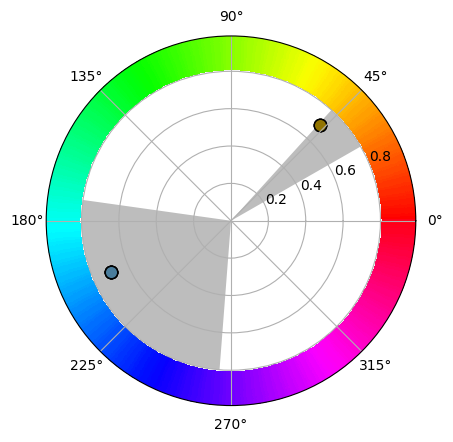

In [21]:
# ------ plot color point on the hue curcle ------
fig = plt.figure()

# hue wheel
theta = np.linspace(0, 2*np.pi, 360)
r = np.random.uniform(0.8, 1, 360)
T, R = np.meshgrid(theta, r)
C = T / (2*np.pi)

ax = fig.add_subplot(111, projection='polar')
# ax.set_axis_off()
ax.pcolormesh(T, R, C, cmap=cm.hsv)

# plot template region
a0, a1, b0, b1 = region * np.pi / 180
theta = np.linspace(a0, a1, 100)
ax.fill_between(theta, 0.8, color='#bdbdbd', edgecolor='none')
theta = np.linspace(b0, b1, 100)
ax.fill_between(theta, 0.8, color='#bdbdbd', edgecolor='none')

# color points
for angle, c in zip(hue, rgb):
    ax.scatter(angle*np.pi/180, 0.7, color=c, s=80, marker='o', edgecolors="black")
plt.show()